In [4]:
%matplotlib notebook

import sympy
import numpy as np
import matplotlib.pyplot as plt

n = 3
t = sympy.symbols('t')

J_lst = sympy.symbols(' '.join(f"J_{i}" for i in range(n)))
T_lst = sympy.symbols(' '.join(f"T_{i}" for i in range(n)))

# Integration

this is a simple interactive implementation of the integration of bang bang commands

$$A_{n+1} = J_n T + A_{n}$$

In [5]:
A_lst = [sympy.symbols('A_0'),]
a_lst = list()
for i in range(n) :
    A_lst.append(
        A_lst[-1] +
        J_lst[i] * T_lst[i]
    )
    a_lst.append(A_lst[i] + sympy.integrate(J_lst[i], t))

For the speed $S$: $$S_{n+1} = \frac{1}{2} J_n T^2 + A_{n} T + S_{n}$$

In [6]:
S_lst = [sympy.symbols('S_0'),]
s_lst = list()
for i in range(n) :
    S_lst.append(
        S_lst[-1] +
        J_lst[i] * T_lst[i]**2 / 2 +
        A_lst[i] * T_lst[i]
    )
    s_lst.append(S_lst[i] + sympy.integrate(a_lst[i], t))

For the position $P$: $$P_{n+1} = \frac{1}{6} J_n T^3 + \frac{1}{2} A_{n} T^2 + S_{n} T + P_{n}$$

In [7]:
P_lst = [sympy.symbols('P_0'),]
p_lst = list()
for i in range(n) :
    P_lst.append(
        P_lst[-1] +
        J_lst[i] * T_lst[i]**3 / 6 +
        A_lst[i] * T_lst[i]**2 / 2 +
        S_lst[i] * T_lst[i]
    )
    p_lst.append(P_lst[i] + sympy.integrate(s_lst[i], t))

In [8]:
def plot(T_lst, x_lst, v_map) :
    X_lst = list()
    Y_lst = list()
    
    T_prev = 0.0
    plt.figure()
    for T, x in zip(T_lst, x_lst) :
        T_stop = float(T.subs(v_map))
        t_arr = np.linspace(0, T_stop, 16)
        y_lst = list()
        x_itm = x.subs(v_map)
        for t in t_arr :
            y_lst.append(float(x_itm.subs({'t': t})))
        X_lst.append(T_prev + t_arr)
        Y_lst.append(np.array(y_lst))
        plt.plot(X_lst[-1], Y_lst[-1])
        T_prev += T_stop
        
    plt.show()
    return X_lst, Y_lst

In [9]:
v_map = {
    'A_0': 0, 'S_0': 0, 'P_0': 0,
    'J_0': 1, 'J_1': 0, 'J_2': -1,
    'T_0': 3, 'T_1': 2, 'T_2': 3,
}

In [36]:
k = 0.064
v_map = {
    'A_0': 0, 'S_0': 0, 'P_0': 0,
    'J_0': k**2, 'J_1': 0, 'J_2': -k**2,
    'T_0': 3/k, 'T_1': 2/k, 'T_2': 3/k,
}
v_map

{'A_0': 0,
 'S_0': 0,
 'P_0': 0,
 'J_0': 0.004096,
 'J_1': 0,
 'J_2': -0.004096,
 'T_0': 46.875,
 'T_1': 31.25,
 'T_2': 46.875}

In [41]:
k * 3.0

0.192

In [37]:
[p.subs(v_map) for p in p_lst]

[0.000682666666666667*t**3,
 0.096*t**2 + 4.5*t + 70.3125,
 -0.000682666666666667*t**3 + 0.096*t**2 + 10.5*t + 304.6875]

<IPython.core.display.Javascript object>


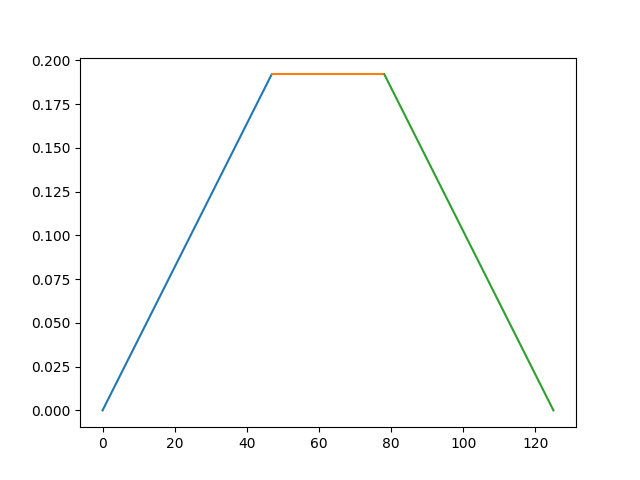

[array([0.    , 0.0128, 0.0256, 0.0384, 0.0512, 0.064 , 0.0768, 0.0896,
        0.1024, 0.1152, 0.128 , 0.1408, 0.1536, 0.1664, 0.1792, 0.192 ]),
 array([0.192, 0.192, 0.192, 0.192, 0.192, 0.192, 0.192, 0.192, 0.192,
        0.192, 0.192, 0.192, 0.192, 0.192, 0.192, 0.192]),
 array([0.192 , 0.1792, 0.1664, 0.1536, 0.1408, 0.128 , 0.1152, 0.1024,
        0.0896, 0.0768, 0.064 , 0.0512, 0.0384, 0.0256, 0.0128, 0.    ])]

In [38]:
Xa_lst, Ya_lst = plot(T_lst, a_lst, v_map)
Ya_lst

<IPython.core.display.Javascript object>


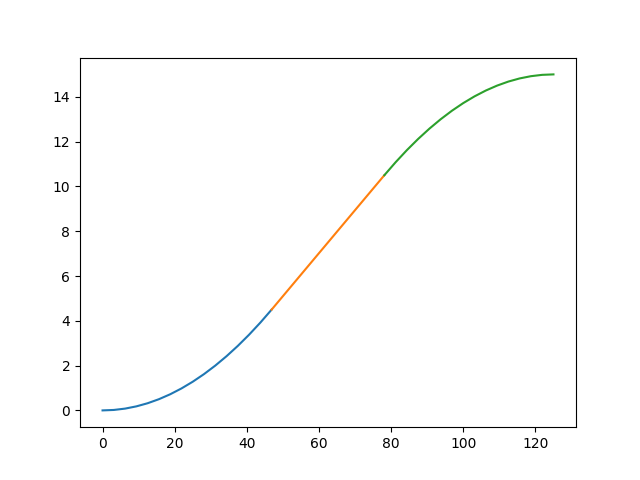

[array([0.  , 0.02, 0.08, 0.18, 0.32, 0.5 , 0.72, 0.98, 1.28, 1.62, 2.  ,
        2.42, 2.88, 3.38, 3.92, 4.5 ]),
 array([ 4.5,  4.9,  5.3,  5.7,  6.1,  6.5,  6.9,  7.3,  7.7,  8.1,  8.5,
         8.9,  9.3,  9.7, 10.1, 10.5]),
 array([10.5 , 11.08, 11.62, 12.12, 12.58, 13.  , 13.38, 13.72, 14.02,
        14.28, 14.5 , 14.68, 14.82, 14.92, 14.98, 15.  ])]

In [39]:
Xs_lst, Ys_lst = plot(T_lst, s_lst, v_map)
Ys_lst

<IPython.core.display.Javascript object>


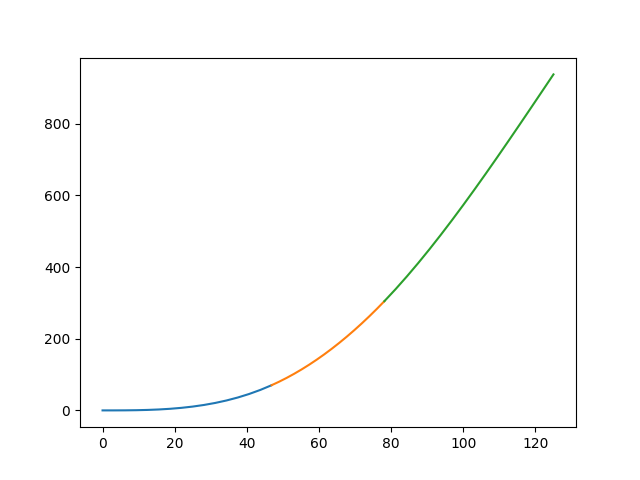

In [40]:
Xp_lst, Yp_lst = plot(T_lst, p_lst, v_map)

<IPython.core.display.Javascript object>


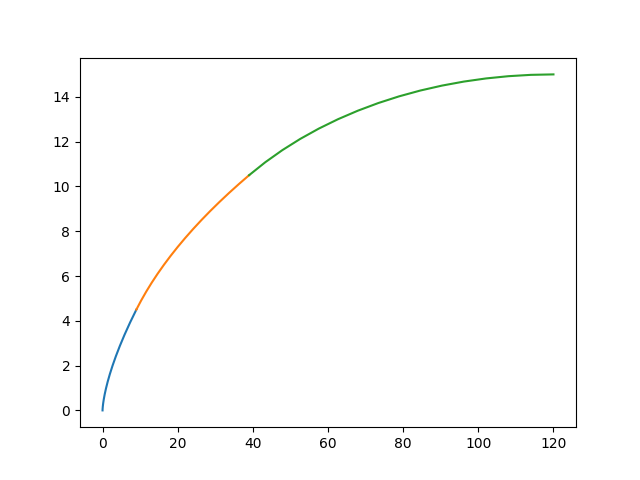

In [22]:
plt.figure()
for Ys, Yp in zip(Ys_lst, Yp_lst) :
    plt.plot(Yp, Ys)
plt.show()